In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import os
from IPython.display import clear_output

In [2]:
# Helper libraries
import numpy as np
import random
%matplotlib inline
import matplotlib
# matplotlib.use('TkAgg')# Backend needed for the Mac virtual env
import matplotlib.pyplot as plt

In [3]:
# Set seeds for reproducibilty
def seed_random_number(seed):
    # see https://stackoverflow.com/a/52897216
    np.random.seed(seed)
    tf.set_random_seed(seed)
    os.environ['PYTHONHASHSEED']=str(seed)
    random.seed(seed)

random_seed = 1
seed_random_number(random_seed)

#####################
# from keras import backend as K
# # see https://stackoverflow.com/a/52897216 we really need singlethread to get
# # reproducible results!
# session_conf = tensorflow.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tensorflow.Session(graph=tensorflow.get_default_graph(), config=session_conf)
# K.set_session(sess)

In [4]:
# Import data set:
Inputs = np.load('Data/Inputs.npy')
Labels = np.load('Data/Labels.npy')
Ndata  = len(Labels[:,0])

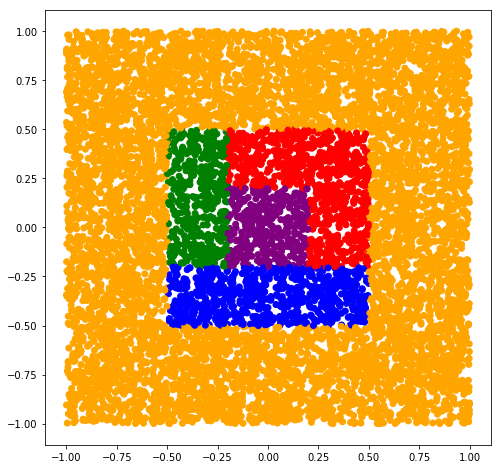

In [5]:
# Visualize data
colors = ['red','green','blue','purple','orange']
clist  = [colors[j] for j in Labels[:,0]]

fig = plt.figure(figsize=(8,8))
plt.scatter(Inputs[:,0], Inputs[:,1], c=clist, cmap=matplotlib.colors.ListedColormap(colors))  

In [6]:
# Segregate data in training and testing data
Ntrain      = 512
Train_Input = Inputs[0:Ntrain,:]
Train_Label = Labels[0:Ntrain,:]
Test_Input  = Inputs[Ntrain::,:]
Test_Label  = Labels[Ntrain::,:]

In [7]:
# Clear keras sessions
keras.backend.clear_session()

# Create network
def create_model(): 
  model = keras.Sequential([
          keras.layers.Dense(100, input_shape = (2,), activation=tf.nn.relu, use_bias=True, kernel_initializer='RandomNormal', bias_initializer='RandomNormal'),
          keras.layers.Dense(100, activation=tf.nn.relu, use_bias=True, kernel_initializer='RandomNormal', bias_initializer='RandomNormal'),
          keras.layers.Dense(5, activation=tf.nn.softmax, use_bias=True, kernel_initializer='RandomNormal', bias_initializer='RandomNormal')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(lr=0.0001), 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  return model


model = create_model()
model.summary()
#model.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               300       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 505       
Total params: 10,905
Trainable params: 10,905
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Training
model.fit(Train_Input, Train_Label, epochs=500, verbose=2, batch_size=32)

Epoch 1/500
 - 0s - loss: 1.5736 - acc: 0.6016
Epoch 2/500
 - 0s - loss: 1.5573 - acc: 0.7461
Epoch 3/500
 - 0s - loss: 1.5393 - acc: 0.7461
Epoch 4/500
 - 0s - loss: 1.5205 - acc: 0.7461
Epoch 5/500
 - 0s - loss: 1.4997 - acc: 0.7461
Epoch 6/500
 - 0s - loss: 1.4768 - acc: 0.7461
Epoch 7/500
 - 0s - loss: 1.4515 - acc: 0.7461
Epoch 8/500
 - 0s - loss: 1.4229 - acc: 0.7461
Epoch 9/500
 - 0s - loss: 1.3896 - acc: 0.7461
Epoch 10/500
 - 0s - loss: 1.3526 - acc: 0.7461
Epoch 11/500
 - 0s - loss: 1.3110 - acc: 0.7461
Epoch 12/500
 - 0s - loss: 1.2670 - acc: 0.7461
Epoch 13/500
 - 0s - loss: 1.2194 - acc: 0.7461
Epoch 14/500
 - 0s - loss: 1.1706 - acc: 0.7461
Epoch 15/500
 - 0s - loss: 1.1215 - acc: 0.7461
Epoch 16/500
 - 0s - loss: 1.0731 - acc: 0.7461
Epoch 17/500
 - 0s - loss: 1.0296 - acc: 0.7461
Epoch 18/500
 - 0s - loss: 0.9892 - acc: 0.7461
Epoch 19/500
 - 0s - loss: 0.9561 - acc: 0.7461
Epoch 20/500
 - 0s - loss: 0.9283 - acc: 0.7461
Epoch 21/500
 - 0s - loss: 0.9065 - acc: 0.7461
E

Epoch 171/500
 - 0s - loss: 0.3320 - acc: 0.9004
Epoch 172/500
 - 0s - loss: 0.3289 - acc: 0.9004
Epoch 173/500
 - 0s - loss: 0.3263 - acc: 0.9023
Epoch 174/500
 - 0s - loss: 0.3233 - acc: 0.9004
Epoch 175/500
 - 0s - loss: 0.3205 - acc: 0.9023
Epoch 176/500
 - 0s - loss: 0.3178 - acc: 0.9023
Epoch 177/500
 - 0s - loss: 0.3154 - acc: 0.9023
Epoch 178/500
 - 0s - loss: 0.3125 - acc: 0.9043
Epoch 179/500
 - 0s - loss: 0.3104 - acc: 0.9043
Epoch 180/500
 - 0s - loss: 0.3073 - acc: 0.9062
Epoch 181/500
 - 0s - loss: 0.3049 - acc: 0.9062
Epoch 182/500
 - 0s - loss: 0.3024 - acc: 0.9082
Epoch 183/500
 - 0s - loss: 0.3000 - acc: 0.9121
Epoch 184/500
 - 0s - loss: 0.2975 - acc: 0.9141
Epoch 185/500
 - 0s - loss: 0.2951 - acc: 0.9160
Epoch 186/500
 - 0s - loss: 0.2925 - acc: 0.9160
Epoch 187/500
 - 0s - loss: 0.2900 - acc: 0.9160
Epoch 188/500
 - 0s - loss: 0.2878 - acc: 0.9180
Epoch 189/500
 - 0s - loss: 0.2854 - acc: 0.9160
Epoch 190/500
 - 0s - loss: 0.2831 - acc: 0.9199
Epoch 191/500
 - 0s 

 - 0s - loss: 0.1260 - acc: 0.9766
Epoch 339/500
 - 0s - loss: 0.1253 - acc: 0.9746
Epoch 340/500
 - 0s - loss: 0.1250 - acc: 0.9766
Epoch 341/500
 - 0s - loss: 0.1244 - acc: 0.9766
Epoch 342/500
 - 0s - loss: 0.1239 - acc: 0.9746
Epoch 343/500
 - 0s - loss: 0.1240 - acc: 0.9766
Epoch 344/500
 - 0s - loss: 0.1236 - acc: 0.9727
Epoch 345/500
 - 0s - loss: 0.1228 - acc: 0.9746
Epoch 346/500
 - 0s - loss: 0.1222 - acc: 0.9746
Epoch 347/500
 - 0s - loss: 0.1220 - acc: 0.9766
Epoch 348/500
 - 0s - loss: 0.1213 - acc: 0.9766
Epoch 349/500
 - 0s - loss: 0.1210 - acc: 0.9766
Epoch 350/500
 - 0s - loss: 0.1207 - acc: 0.9746
Epoch 351/500
 - 0s - loss: 0.1201 - acc: 0.9766
Epoch 352/500
 - 0s - loss: 0.1199 - acc: 0.9766
Epoch 353/500
 - 0s - loss: 0.1195 - acc: 0.9766
Epoch 354/500
 - 0s - loss: 0.1189 - acc: 0.9766
Epoch 355/500
 - 0s - loss: 0.1189 - acc: 0.9766
Epoch 356/500
 - 0s - loss: 0.1183 - acc: 0.9766
Epoch 357/500
 - 0s - loss: 0.1177 - acc: 0.9766
Epoch 358/500
 - 0s - loss: 0.1173

In [9]:
# Test accuracy of trained model
test_loss, test_acc = model.evaluate(Test_Input, Test_Label)
print('Test accuracy:', test_acc)

9488/9488 [==============================] - 0s 20us/step
('Test accuracy:', 0.9718591905564924)


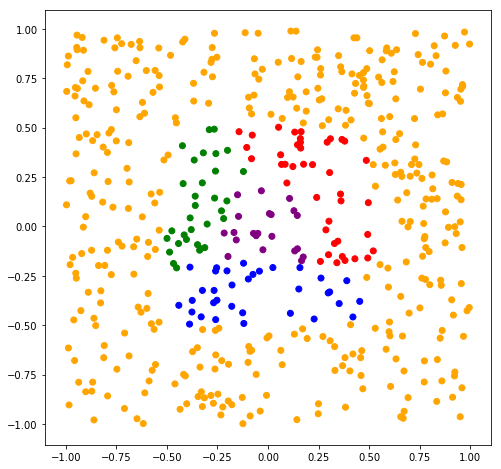

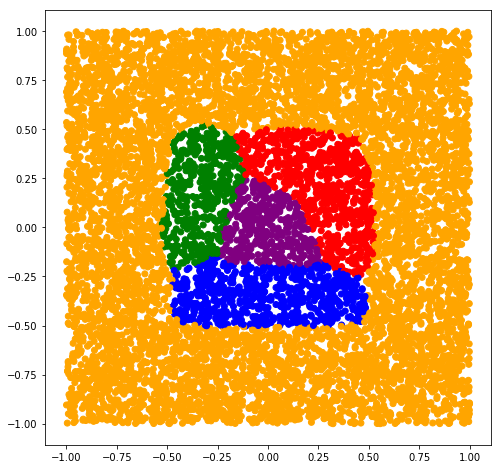

In [10]:
# Make prediction plots
Train_pred = np.argmax(model.predict(Train_Input),axis=1)  
Test_pred  = np.argmax(model.predict(Test_Input),axis=1)

clist  = [colors[j] for j in Train_pred]
fig = plt.figure(figsize=(8,8))
plt.scatter(Train_Input[:,0], Train_Input[:,1], c=clist, cmap=matplotlib.colors.ListedColormap(colors)) 

clist  = [colors[j] for j in Test_pred]
fig = plt.figure(figsize=(8,8))
plt.scatter(Test_Input[:,0], Test_Input[:,1], c=clist, cmap=matplotlib.colors.ListedColormap(colors)) 